In [1]:
from bs4 import BeautifulSoup as bs
import requests
import numpy as np
import pandas as pd

In [5]:
link = "https://www.amazon.in/s?k=samsung&ref=nb_sb_noss_2"
page = requests.get(link)
page

<Response [200]>

In [6]:
# page.content

In [7]:
soup = bs(page.content,'html.parser')

In [8]:
# print(soup.prettify())

In [9]:
names = soup.find_all('span',class_="a-size-medium a-color-base a-text-normal")

In [10]:
mobiles = []
for i in names:
    mobiles.append(i.get_text())

In [11]:
mobiles[1].split("(")[1].split(",")[0]

'Ocean Blue'

In [12]:
battery=[]                                                                                                      # done
ram=[]                                                                                                            # done
storage=[]                                                                                                      # done
refresh_rate=[]                                                                                             # done
name_of_mobile=[]                                                                                        # done
color=[]                                                                                                          # done
size=[]                                                                                                            # done
camera=[]                                                                                                       # done                                                                                                  
device_type = []                                                                                             # done
for i in mobiles:
    name_of_mobile.append(i.split("(")[0])
    if "Tab " in i:
        color.append(i.split("(")[1].split(",")[-1])
        device_type.append("Tab")
    else:
        color.append(i.split("(")[1].split(",")[0])
        device_type.append("Mobile Phone")
    if "cm" in i:
        index=i.index("cm")
#         print(i[index-6:index-1])
        size.append(i[index-6:index-1])
    else:
        size.append("")
    if  'mAh' in i:
        index=i.index("mAh")
#         print(i[index-5:index-1])
        battery.append(i[index-5:index-1])
    else:
        battery.append("")
    if 'GB Storage' in i:
        index=i.index("GB Storage")
#         print(i[index-3:index])
        storage.append(i[index-3:index])
    else:
        storage.append("")
    if 'RAM'  in i :
        if 'GB RAM' in i:
            index=i.index("GB RAM")
#             print("*",i[index-1])
            ram.append(i[index-1])
        elif ', RAM' in i:
            index = i.index(", RAM")
#             print("-",i[index+6])
            ram.append(i[index+6])
        else:
            print("something went wrong")
#             print("++++++++")
    else:
#         print("")
        ram.append("")
    if 'Hz Refresh Rate' in i:
        index=i.index("Hz Refresh Rate")
#         print(i[index-2:index])
        refresh_rate.append(i[index-2:index])
    else:
        refresh_rate.append("")
    if 'MP' in i:
        index=i.index("MP")
#         print(i[index-3:index])
        camera.append(i[index-3:index])
    else:
#         print("")
        camera.append("")

In [13]:
ratings =  soup.find_all('span',class_="a-icon-alt")

In [14]:
ratings_new = []
for i in ratings:
    ratings_new.append(i.get_text())

In [15]:
ratings_new = ratings_new[:-4]

In [16]:
rating = []
for i in ratings_new:
    rating.append(i[:3])

In [17]:
number_of_reviews =  soup.find_all('span',class_="a-size-base")

In [18]:
reviews_posted = []
for i in number_of_reviews:
    try:
        aa= i.get_text()
        aa = aa.replace(',',"")
        reviews_posted.append(int(aa))
    except:
        pass

In [19]:
price = soup.find_all("span","a-price-whole")

In [20]:
amount = []
for i in price:
    try:
        aa= i.get_text()
        aa = aa.replace(',',"")
        amount.append(int(aa))
    except:
        pass

In [21]:
price

[<span class="a-price-whole">13,499</span>,
 <span class="a-price-whole">16,499</span>,
 <span class="a-price-whole">10,999</span>,
 <span class="a-price-whole">10,999</span>,
 <span class="a-price-whole">9,999</span>,
 <span class="a-price-whole">13,499</span>,
 <span class="a-price-whole">7,499</span>,
 <span class="a-price-whole">17,999</span>,
 <span class="a-price-whole">10,999</span>,
 <span class="a-price-whole">18,499</span>,
 <span class="a-price-whole">6,199</span>,
 <span class="a-price-whole">9,999</span>,
 <span class="a-price-whole">14,999</span>,
 <span class="a-price-whole">13,499</span>,
 <span class="a-price-whole">7,499</span>,
 <span class="a-price-whole">24,999</span>]

In [22]:
amount

[13499,
 16499,
 10999,
 10999,
 9999,
 13499,
 7499,
 17999,
 10999,
 18499,
 6199,
 9999,
 14999,
 13499,
 7499,
 24999]

In [23]:
purchased = [np.random.choice(["No","Yes"]) for i in range(0,len(name_of_mobile))]

In [24]:
import pandas as pd
import numpy as np
data = pd.DataFrame({'name_of_mobile':name_of_mobile,
                     'device_type':device_type,
                    'color':color,
                    'size':size,
                     'battery':battery,
                     'ram':ram,
                     'storage':storage,
                     'refresh_rate':refresh_rate,
                     'camera':camera,
                     'rating':rating,
                     'reviews_posted':reviews_posted,
                     'amount':amount,
                     'purchased':purchased
                     # this is randomly generated and this is the target variable too
                    })

In [25]:
data

,name_of_mobile,device_type,color,size,battery,ram,storage,refresh_rate,camera,rating,reviews_posted,amount,purchased
0,Samsung Galaxy M12,Mobile Phone,Blue,,6000,6,128,90,48,3.7,308,13499,Yes
1,Samsung Galaxy M31,Mobile Phone,Ocean Blue,,,6,128,,,4.2,146261,16499,Yes
2,Samsung Galaxy M12,Mobile Phone,Black,,6000,4,64,90,48,3.7,308,10999,Yes
3,Samsung Galaxy M12,Mobile Phone,Blue,,6000,4,64,90,48,3.7,308,10999,No
4,Samsung Galaxy M02s,Mobile Phone,Blue,,5000,4,64,,,4.1,3886,9999,No
5,Samsung Galaxy M12,Mobile Phone,Black,,6000,6,128,90,48,3.7,308,13499,Yes
6,Samsung Galaxy M02,Mobile Phone,Black,,,3,32,,,3.8,2883,7499,No
7,Samsung Galaxy Tab A7 26.31 cm,Tab,Grey,26.31,,3,,,,4.4,2862,17999,Yes
8,Samsung Galaxy M12,Mobile Phone,White,,6000,4,64,90,48,3.7,308,10999,Yes
9,Samsung Galaxy M31s,Mobile Phone,Mirage Blue,,,6,128,,,4.3,48777,18499,No


In [26]:
data =data.replace("",np.nan)
data
# data.to_csv("data.csv",index=False)

,name_of_mobile,device_type,color,size,battery,ram,storage,refresh_rate,camera,rating,reviews_posted,amount,purchased
0,Samsung Galaxy M12,Mobile Phone,Blue,NaN,6000,6,128,90,48,3.7,308,13499,Yes
1,Samsung Galaxy M31,Mobile Phone,Ocean Blue,NaN,NaN,6,128,NaN,NaN,4.2,146261,16499,Yes
2,Samsung Galaxy M12,Mobile Phone,Black,NaN,6000,4,64,90,48,3.7,308,10999,Yes
3,Samsung Galaxy M12,Mobile Phone,Blue,NaN,6000,4,64,90,48,3.7,308,10999,No
4,Samsung Galaxy M02s,Mobile Phone,Blue,NaN,5000,4,64,NaN,NaN,4.1,3886,9999,No
5,Samsung Galaxy M12,Mobile Phone,Black,NaN,6000,6,128,90,48,3.7,308,13499,Yes
6,Samsung Galaxy M02,Mobile Phone,Black,NaN,NaN,3,32,NaN,NaN,3.8,2883,7499,No
7,Samsung Galaxy Tab A7 26.31 cm,Tab,Grey,26.31,NaN,3,NaN,NaN,NaN,4.4,2862,17999,Yes
8,Samsung Galaxy M12,Mobile Phone,White,NaN,6000,4,64,90,48,3.7,308,10999,Yes
9,Samsung Galaxy M31s,Mobile Phone,Mirage Blue,NaN,NaN,6,128,NaN,NaN,4.3,48777,18499,No


In [27]:
data.isnull().sum()

name_of_mobile     0
device_type        0
color              0
size              14
battery            8
ram                0
storage            2
refresh_rate      10
camera            10
rating             0
reviews_posted     0
amount             0
purchased          0
dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
x=data.drop(["purchased","name_of_mobile"],axis=1)
y=data[["purchased"]]

In [29]:
x

,device_type,color,size,battery,ram,storage,refresh_rate,camera,rating,reviews_posted,amount
0,Mobile Phone,Blue,NaN,6000,6,128,90,48,3.7,308,13499
1,Mobile Phone,Ocean Blue,NaN,NaN,6,128,NaN,NaN,4.2,146261,16499
2,Mobile Phone,Black,NaN,6000,4,64,90,48,3.7,308,10999
3,Mobile Phone,Blue,NaN,6000,4,64,90,48,3.7,308,10999
4,Mobile Phone,Blue,NaN,5000,4,64,NaN,NaN,4.1,3886,9999
5,Mobile Phone,Black,NaN,6000,6,128,90,48,3.7,308,13499
6,Mobile Phone,Black,NaN,NaN,3,32,NaN,NaN,3.8,2883,7499
7,Tab,Grey,26.31,NaN,3,NaN,NaN,NaN,4.4,2862,17999
8,Mobile Phone,White,NaN,6000,4,64,90,48,3.7,308,10999
9,Mobile Phone,Mirage Blue,NaN,NaN,6,128,NaN,NaN,4.3,48777,18499


In [30]:
y

,purchased
0,Yes
1,Yes
2,Yes
3,No
4,No
5,Yes
6,No
7,Yes
8,Yes
9,No


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x["device_type"] = le.fit_transform(x["device_type"])
x["color"] = le.fit_transform(x["color"])
x["color"] = le.fit_transform(x["color"])
y["purchased"] = le.fit_transform(y["purchased"])

<ipython-input-31-2135e6779092>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["purchased"] = le.fit_transform(y["purchased"])


In [32]:
x =x.replace(np.nan,0)

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,shuffle=True,test_size=0.2)

In [34]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(xtrain,ytrain)
predictions = lr.predict(xtest)

C:\Users\Emirates\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [35]:
predictions

array([1, 1, 0, 1])

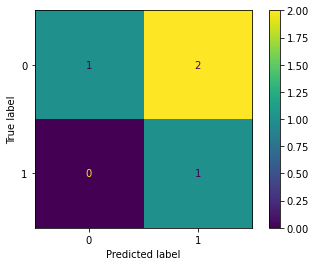

In [36]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix
plot_confusion_matrix(lr,xtest,ytest)

In [37]:
accuracy_score(predictions,ytest)

0.5